## Task 3

### Exploratory Data Analysis - Retail

##### Level(Beginner)

In [129]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)  #to display all the columns

In [130]:
#Load the data or read the data
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [131]:
#load the last five rows of the data
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [132]:
#Get the shape of the data
print('No of records: ',df.shape[0])
print('No of variables: ',df.shape[1])

No of records:  9994
No of variables:  13


In [133]:
#get the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [134]:
#Get the summary of the data known as statistical,description of the data 
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [135]:
#check the relationship between the variables with the help of corrrelation
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


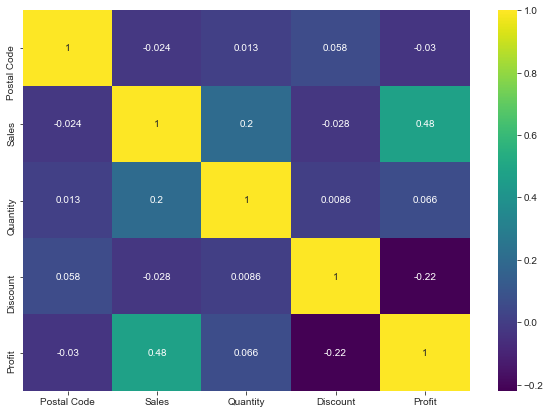

In [136]:
#Display the relation with the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [137]:
#Check any missing values in the data
miss_data=pd.DataFrame({'Missing_values':df.isnull().sum(),"percentage of missing":(df.isnull().sum()/df.shape[0])*100})
miss_data                        

,Missing_values,percentage of missing
Ship Mode,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0
State,0,0.0
Postal Code,0,0.0
Region,0,0.0
Category,0,0.0
Sub-Category,0,0.0
Sales,0,0.0


We can see that there is no missing values in the data, Hence we move ahead in to further process.

In [138]:
#Check the data type,unique count of the variables
uniq_count=pd.DataFrame({'Unique':df.nunique(),'Dtype':df.dtypes})
uniq_count

,Unique,Dtype
Ship Mode,4,object
Segment,3,object
Country,1,object
City,531,object
State,49,object
Postal Code,631,int64
Region,4,object
Category,3,object
Sub-Category,17,object
Sales,5825,float64


In [139]:
#Categorical data
cat_data=df.select_dtypes(include='object')
cat_data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


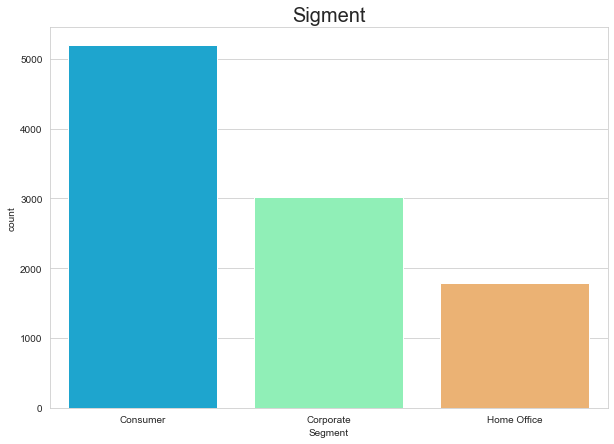

In [140]:
#Visualize the cateogrical data
plt.figure(figsize=(10,7))
sns.set_style(style='whitegrid')
sns.countplot(x=cat_data['Segment'],palette='rainbow')
plt.title('Sigment',fontsize=20)
plt.show()

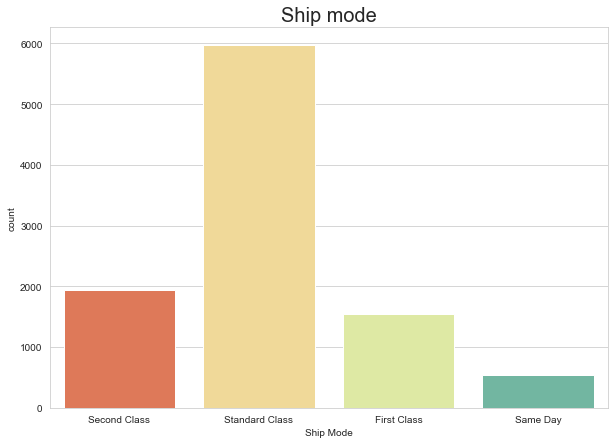

In [141]:
plt.figure(figsize=(10,7))
sns.set_style(style='whitegrid')
sns.countplot(x=cat_data['Ship Mode'],palette='Spectral')
plt.title('Ship mode',fontsize=20)
plt.show()

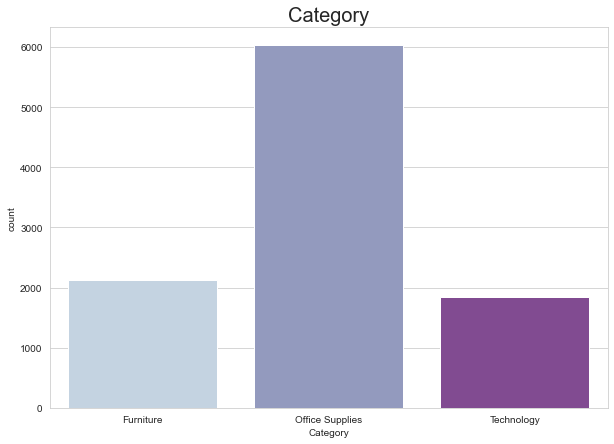

In [142]:
plt.figure(figsize=(10,7))
sns.set_style(style='whitegrid')
sns.countplot(x=cat_data['Category'],palette='BuPu')
plt.title('Category',fontsize=20)
plt.show()

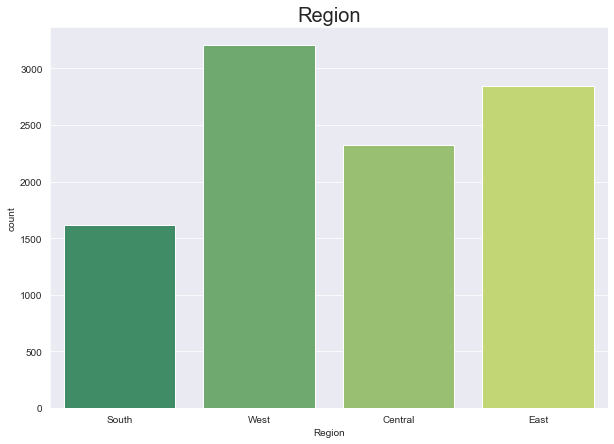

In [143]:
plt.figure(figsize=(10,7))
sns.set_style(style='darkgrid')
sns.countplot(x=cat_data['Region'],palette='summer')
plt.title('Region',fontsize=20)
plt.show()

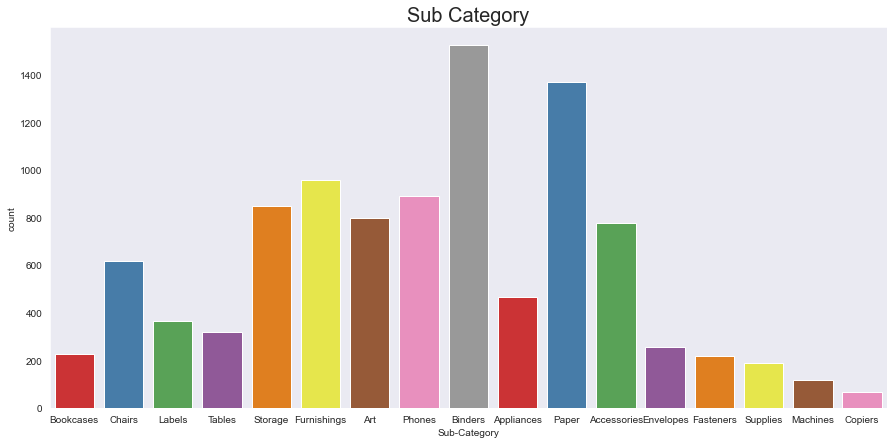

In [144]:
plt.figure(figsize=(15,7))
sns.set_style(style='dark')
sns.countplot(x=cat_data['Sub-Category'],palette='Set1')
plt.title('Sub Category',fontsize=20)
plt.show()

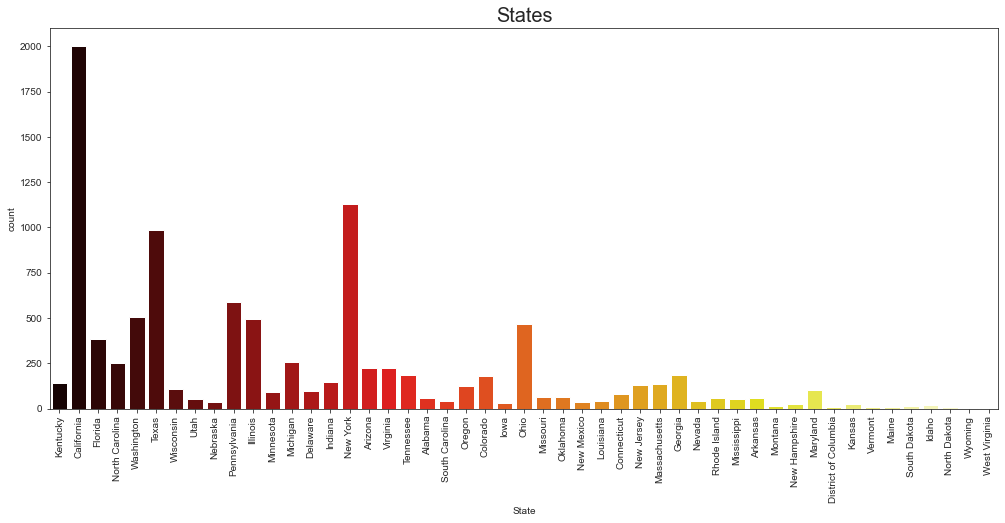

In [145]:
plt.figure(figsize=(17,7))
sns.set_style(style='ticks')
sns.countplot(x=cat_data['State'],palette='hot')
plt.xticks(rotation=90)
plt.title('States',fontsize=20)
plt.show()

In [146]:
#numerical data
num_data=df._get_numeric_data()
num_data.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


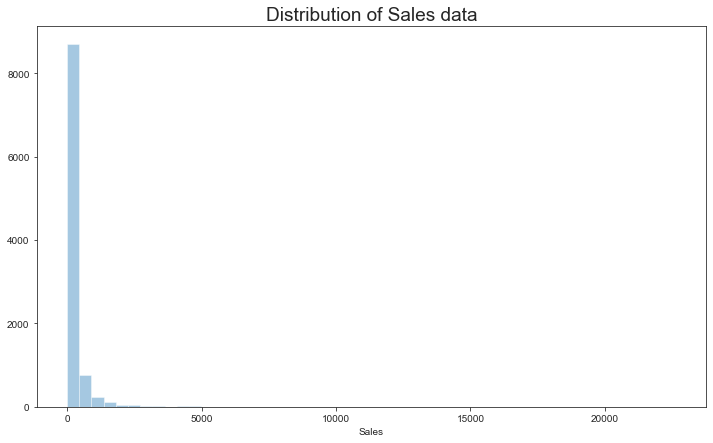

In [147]:
plt.figure(figsize=(12,7))
sns.distplot(num_data['Sales'],kde=False)
plt.title('Distribution of Sales data',fontsize=19)
plt.show()

As we can see most of the data in sales is on 3rd standard deviation and also it shows some skwenes to the right.

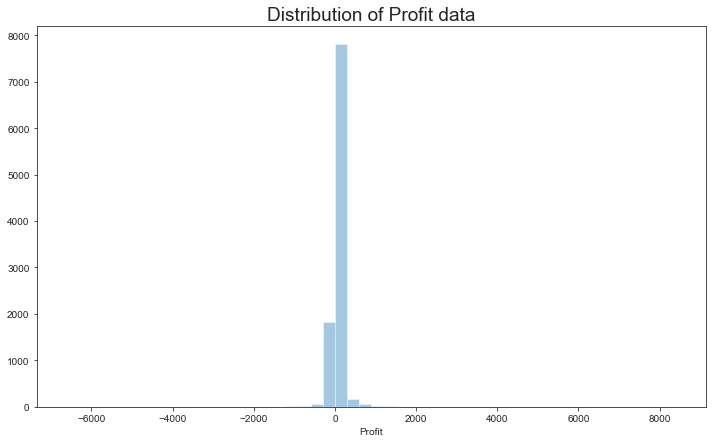

In [148]:
plt.figure(figsize=(12,7))
sns.distplot(num_data['Profit'],kde=False)
plt.title('Distribution of Profit data',fontsize=19)
plt.show()

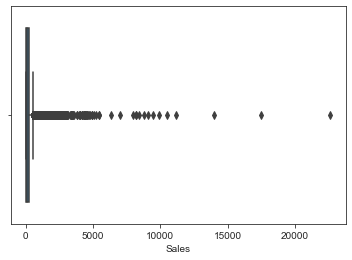

In [149]:
#Check the outier's with the help of boxplot
sns.boxplot(num_data['Sales'])

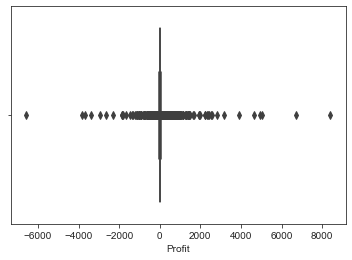

In [150]:
sns.boxplot(num_data['Profit'])

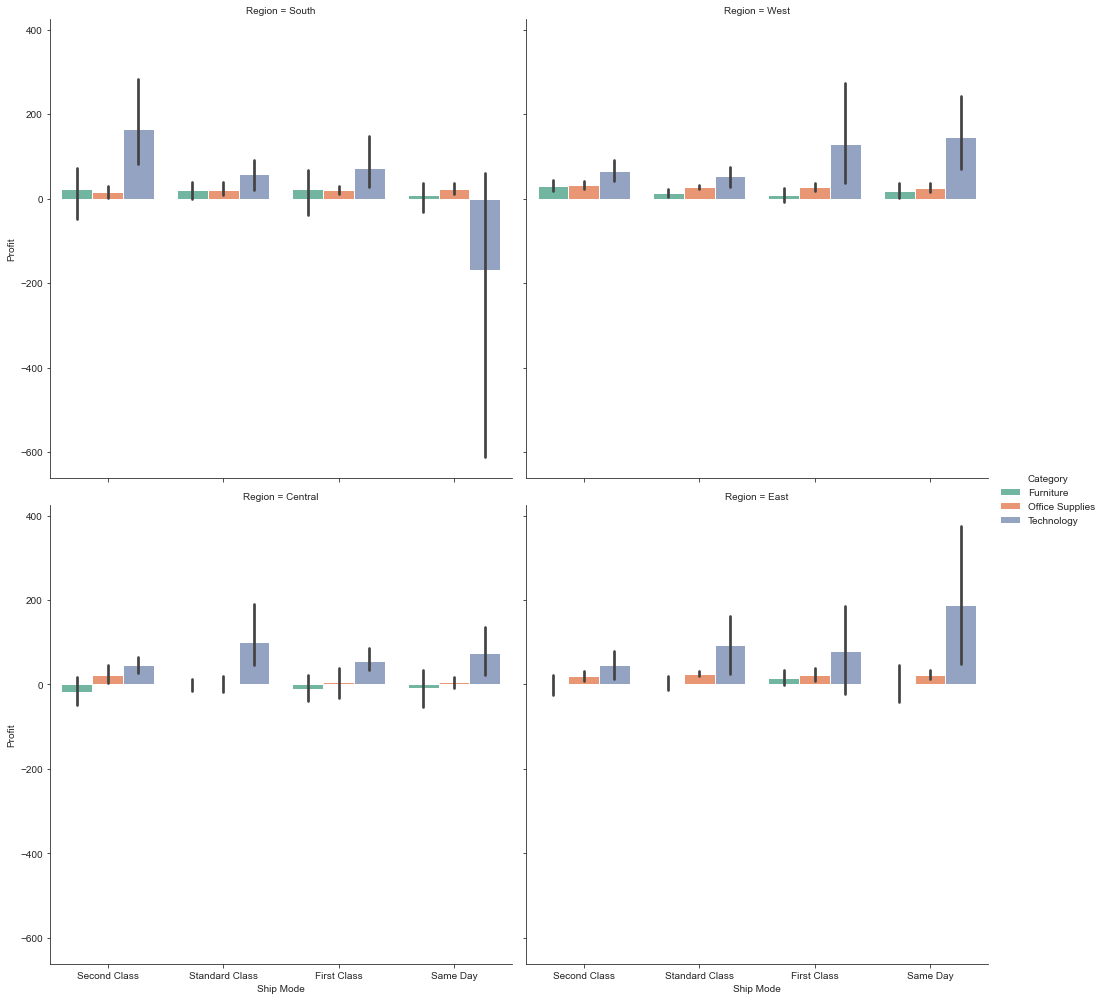

In [151]:
#Check the relationship between the variables to the target
sns.catplot(x='Ship Mode',y='Profit',data=df,hue='Category',kind='bar',col='Region',col_wrap=2,height=7,palette='Set2')
plt.show()

Text(0.5, 1.0, 'Top 10 Cityes')

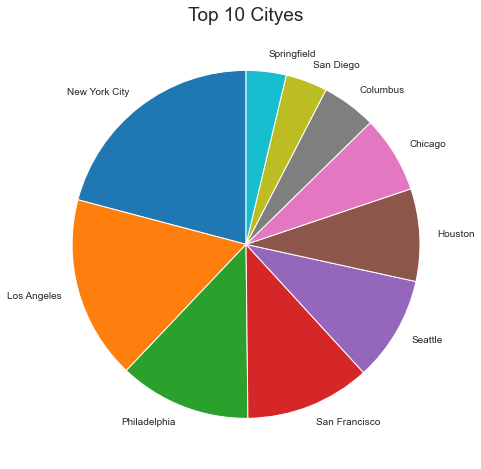

In [152]:
#Top 10 cityes
valu=df['City'].value_counts().head(10).values
ind=list(df['City'].value_counts().head(10).index)
plt.figure(figsize=(10,8))
plt.pie(valu,labels=ind,pctdistance=0.6,shadow=False,startangle=90)
plt.title('Top 10 Cityes',fontsize=19)

Text(0.5, 1.0, 'Top 10 States')

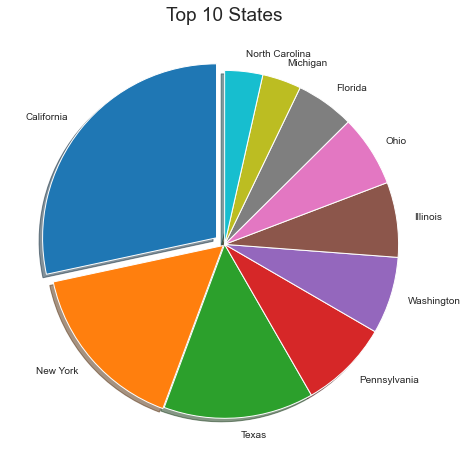

In [153]:
#Top 10 cityes
valu=df['State'].value_counts().head(10).values
ind=list(df['State'].value_counts().head(10).index)
plt.figure(figsize=(10,8))
plt.pie(valu,labels=ind,pctdistance=0.6,explode=[0.06,0.01,0,0,0,0,0,0,0,0],shadow=True,startangle=90)
plt.title('Top 10 States',fontsize=19)

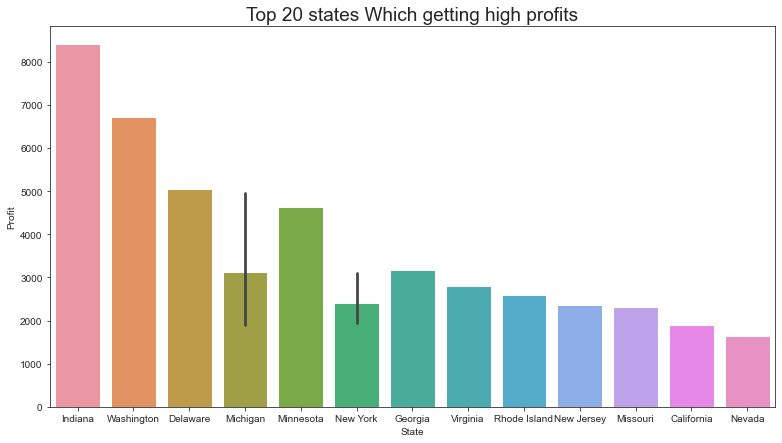

In [80]:
#top 20 states which getting high profits
top20_states=df[['Profit','State']].nlargest(20,columns=['Profit'])
plt.figure(figsize=(13,7))
sns.barplot(x='State',y='Profit',data=top20_states)
plt.title('Top 20 states Which getting high profits',fontsize=19)
plt.show()

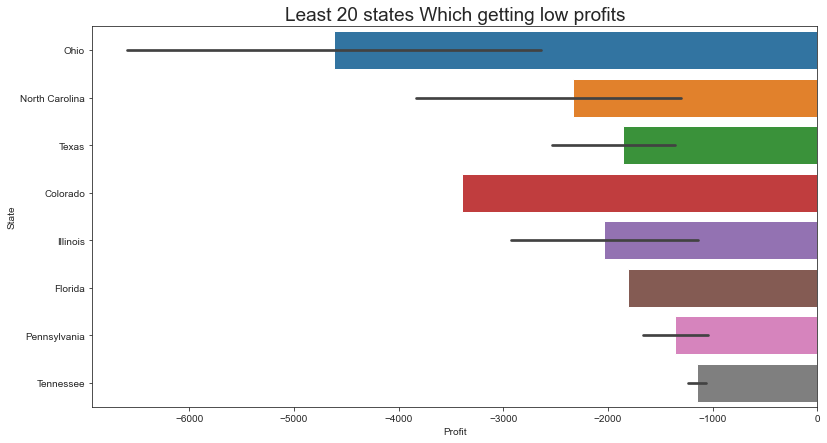

In [81]:
#top 20 states which getting low profits
top20_states=df[['Profit','State']].nsmallest(20,columns=['Profit'])
plt.figure(figsize=(13,7))
sns.barplot(x='Profit',y='State',data=top20_states)
plt.title('Least 20 states Which getting low profits',fontsize=19)
plt.show()

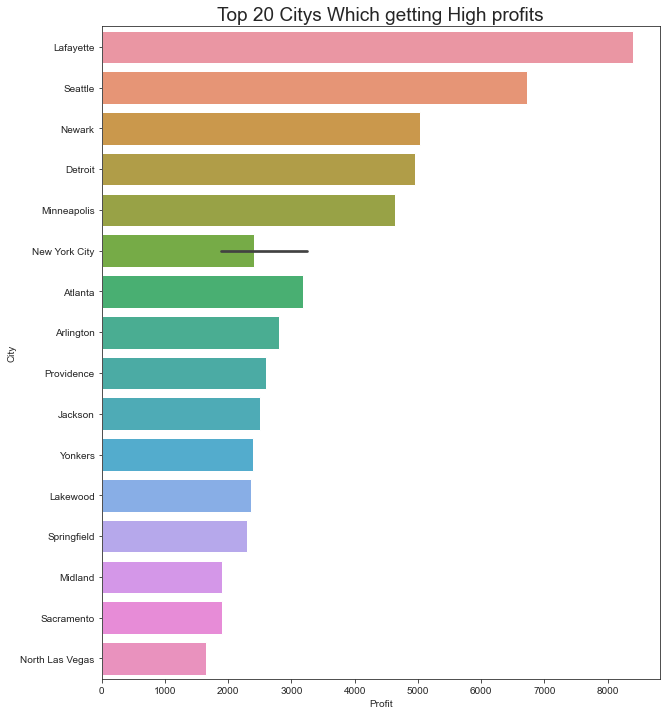

In [82]:
#top 20 Citys which getting High profits
top20_states=df[['Profit','City']].nlargest(20,columns=['Profit'])
plt.figure(figsize=(10,12))
sns.barplot(x='Profit',y='City',data=top20_states)
plt.title('Top 20 Citys Which getting High profits',fontsize=19)
plt.show()

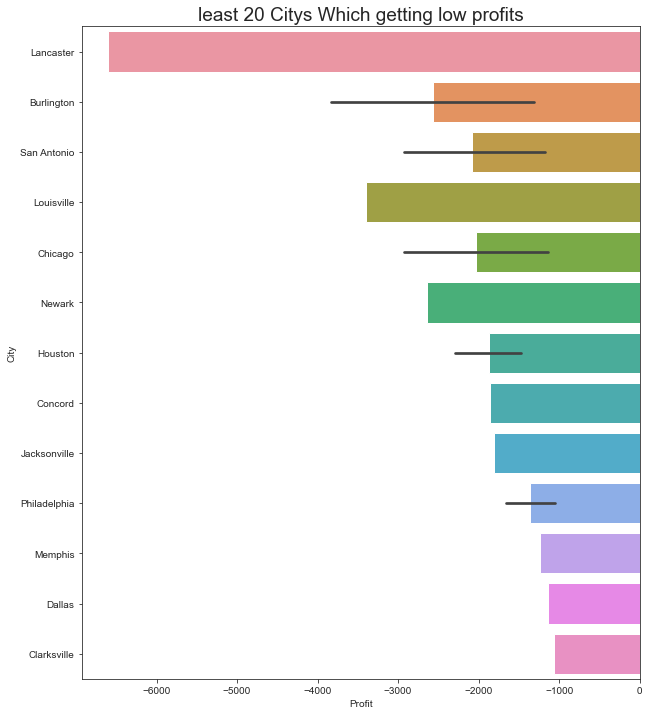

In [83]:
#top 20 Citys which getting High profits
top20_states=df[['Profit','City']].nsmallest(20,columns=['Profit'])
plt.figure(figsize=(10,12))
sns.barplot(x='Profit',y='City',data=top20_states)
plt.title('least 20 Citys Which getting low profits',fontsize=19)
plt.show()

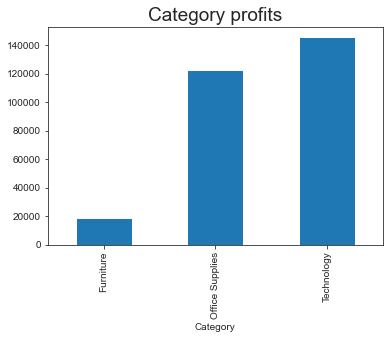

In [84]:
#Ctegory vs profits
df.groupby('Category')['Profit'].sum().plot.bar()
plt.title('Category profits',fontsize=19)
plt.show()

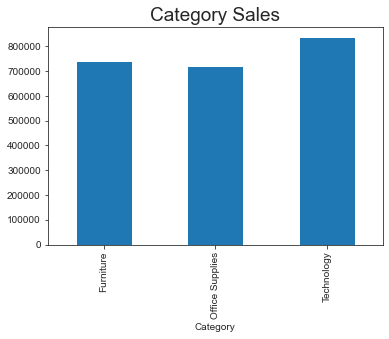

In [85]:
#Ctegory vs sales
df.groupby('Category')['Sales'].sum().plot.bar()
plt.title('Category Sales',fontsize=19)
plt.show()

As compared to the above plots the sales on Categorys like Furniture,Office Supplies and Technology has somewhere equal but when we compared to profits the Furniture getting very low profits as compared to the other

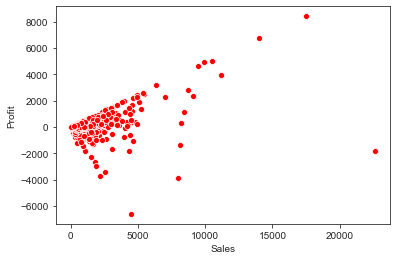

In [86]:
#Relation ship between the sales and profit
sns.scatterplot(df['Sales'],df['Profit'],markers='o',color='r')

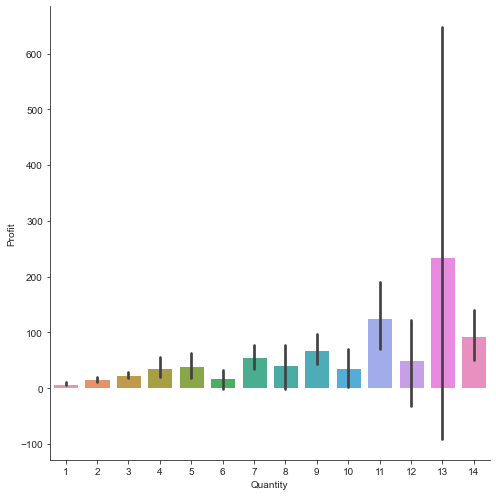

In [87]:
#Display the amount of quantity getting higher profits
sns.catplot(x='Quantity',y='Profit',data=df,kind='bar',height=7)

In [89]:
#Feature engineering
#The columns such as 'Country','Postal code' doesn't require
df_new=df.copy()
df_new.drop(columns=['Country','Postal Code'],axis=1,inplace=True)

In [90]:
#Encode the categorical data in to numerical data to better understanding the data during the model building
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df_new['Ship Mode']=lc.fit_transform(df_new['Ship Mode'])
df_new['Segment']=lc.fit_transform(df_new['Segment'])
df_new['City']=lc.fit_transform(df_new['City'])
df_new['State']=lc.fit_transform(df_new['State'])
df_new['Region']=lc.fit_transform(df_new['Region'])
df_new['Category']=lc.fit_transform(df_new['Category'])
df_new['Sub-Category']=lc.fit_transform(df_new['Sub-Category'])

In [91]:
#After transformations of categorical data in to numerical data
df_new.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,194,15,2,0,4,261.9600,2,0.00,41.9136
1,2,0,194,15,2,0,5,731.9400,3,0.00,219.5820
2,2,1,266,3,3,1,10,14.6200,2,0.00,6.8714
3,3,0,153,8,2,0,16,957.5775,5,0.45,-383.0310
4,3,0,153,8,2,1,14,22.3680,2,0.20,2.5164


In [92]:
#feature transformation
df_new['Sales']=np.log(df_new['Sales'])

In [93]:
#Split the data in to x and y
x=df_new.drop(['Profit'],1)
y=df_new['Profit']

In [94]:
#splitting the data in to train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [95]:
#Model building
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [96]:
algos = [LinearRegression(),RandomForestRegressor(),Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),SVR()]

names = ['Linear Regression','RandomForestRegressor', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','SVR']

rmse_list = []

In [97]:
for name in algos:
    model = name
    model.fit(x_train,y_train)
    train_score= model.score(x_train,y_train)
    test_Score=model.score(x_test,y_test)
    rmse_list.append([train_score,test_Score])

In [98]:
#Get the evaluation performnace on the data
evaluat=pd.DataFrame({'Model':names,'Train score & Test score':rmse_list})
evaluat

,Model,Train score & Test score
0,Linear Regression,"[0.0917060764968669, 0.08198695247863363]"
1,RandomForestRegressor,"[0.953994191144123, 0.8174444637559162]"
2,Ridge Regression,"[0.09170564399755554, 0.08195317970591931]"
3,Lasso Regression,"[0.09102014551518889, 0.07990490703565545]"
4,K Neighbors Regressor,"[0.4528011959668823, 0.03505712059895005]"
5,Decision Tree Regressor,"[0.9999889910585689, 0.7707224260582429]"
6,SVR,"[-0.006187502567199354, -0.006965253278382155]"


from the above performances metrics RandomForestRegressor performs well in our usecase as compared to the other algorithem's, we may select the algorithem for further predictions on the new data.